In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('../DataSets/data_set.csv')

x = pd.DataFrame(dataset.iloc[:, 0:3].values)
y = dataset.iloc[:, 3].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [5]:
from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor(n_estimators = 10, random_state = 0)

RFreg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [6]:
y_pred = RFreg.predict(x_test)

In [7]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test,y_pred)

0.24451592588193533

In [8]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9875469035596917

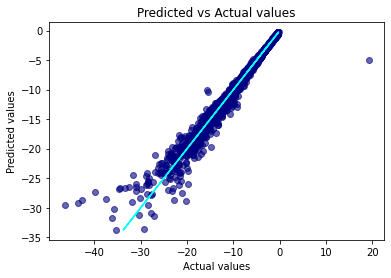

In [9]:
import matplotlib.pyplot as plt

def generatePredictionPlot(y_pred, y_test):
    plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
    plt.plot(y_pred, y_pred,color='cyan')
    plt.title('Predicted vs Actual values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
generatePredictionPlot(y_pred, y_test)

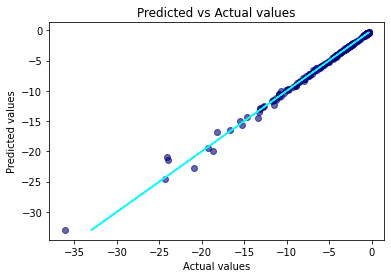

In [10]:
# Generating random set

df = pd.DataFrame(dataset);
rand_frame = df.sample(n = 300)

rand_x = rand_frame.iloc[:, 0:3].values
rand_y = rand_frame.iloc[:, 3].values

y_pred_rand = RFreg.predict(rand_x)

generatePredictionPlot(y_pred_rand, rand_y)

In [11]:
# Generating random data sets

import numpy
import pandas

SAMPLE_SIZE = 10

def randomSample(low, high, size):
    rand_rad = numpy.random.uniform(low, high, size)
    for i in range(0, rand_rad.size):
        rand_rad[i] = round(rand_rad[i], 2)
    return rand_rad

rand_rad = randomSample(13, 15, SAMPLE_SIZE)
rand_height = randomSample(13, 15, SAMPLE_SIZE)
rand_freq = randomSample(1, 5, SAMPLE_SIZE)

rand_x = []
for i in range(0,SAMPLE_SIZE):
    rand_x.append([rand_height[i], rand_rad[i], rand_freq[i]])

y_pred_rand = RFreg.predict(rand_x)

output = []
for i in range(0, SAMPLE_SIZE):
    output.append([rand_height[i], rand_rad[i], rand_freq[i], y_pred_rand[i]])
    
# Creating Dataframe
output_df = pandas.DataFrame(output, columns= ["Height", "Radius", "Frequency", "S11"])
print("Predicted Values for random samples\n")
print(output_df)

Predicted Values for random samples

   Height  Radius  Frequency       S11
0   13.36   14.67       2.70 -2.267222
1   14.23   14.41       1.07 -0.456576
2   14.20   14.75       3.95 -2.718506
3   14.34   13.00       4.07 -2.207502
4   13.87   13.92       3.03 -6.358980
5   13.08   13.85       2.26 -0.577477
6   13.22   14.08       2.83 -2.551473
7   14.19   13.01       1.32 -0.413369
8   13.64   14.90       3.42 -3.943640
9   14.95   13.97       4.56 -5.732182
